SCVAE2D_EXACT
../paper/figures/results/SCVAE2D_EXACT/
Group: SCVAE2D(64)?dataset=CelebA&batch_size=128&count_sampling=EXACT&pixel_sampling=EXACT&max_epochs=100 - val_kl_loss
Group: VAE(64)?dataset=CelebA&batch_size=128&max_epochs=100 - val_kl_loss


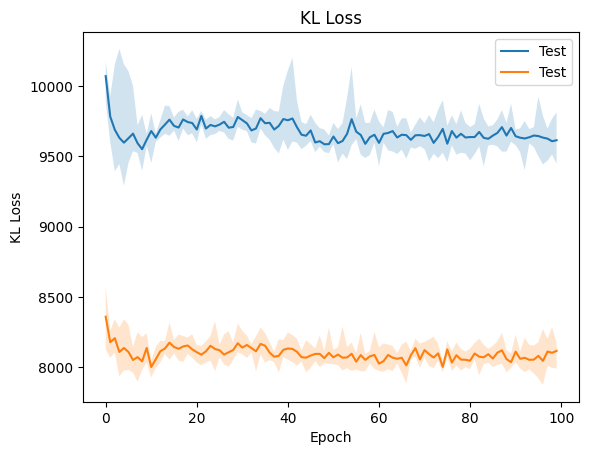

SCVAE2D_EXACT
../paper/figures/results/SCVAE2D_EXACT/
Group: SCVAE2D(64)?dataset=CelebA&batch_size=128&count_sampling=EXACT&pixel_sampling=EXACT&max_epochs=100 - val_recon_loss_0
Group: VAE(64)?dataset=CelebA&batch_size=128&max_epochs=100 - val_recon_loss_0


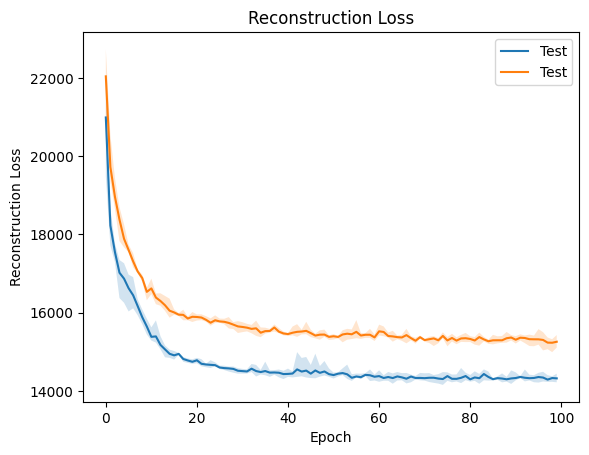

SCVQVAE2D_EXACT
../paper/figures/results/SCVQVAE2D_EXACT/
Group: SCVQVAE2D(256_64_[128, 256]_4_SOFT)?dataset=CIFAR10&batch_size=128&count_sampling=EXACT&pixel_sampling=EXACT&max_epochs=100 - val_vq_loss
Group: VQVAE(256_64_[128, 256]_4)?dataset=CIFAR10&batch_size=128&max_epochs=100 - val_vq_loss


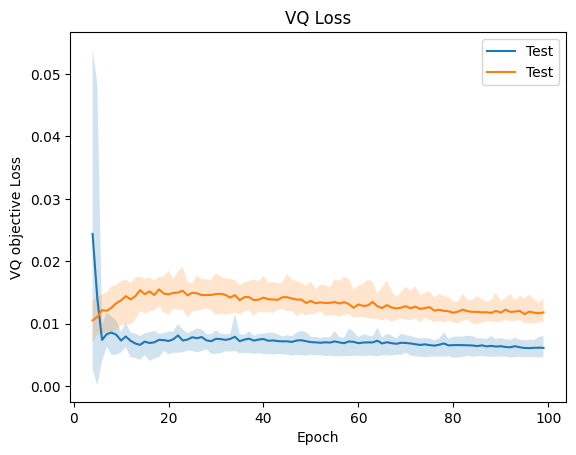

SCVQVAE2D_EXACT
../paper/figures/results/SCVQVAE2D_EXACT/
Group: SCVQVAE2D(256_64_[128, 256]_4_SOFT)?dataset=CIFAR10&batch_size=128&count_sampling=EXACT&pixel_sampling=EXACT&max_epochs=100 - val_recon_loss_0
Group: VQVAE(256_64_[128, 256]_4)?dataset=CIFAR10&batch_size=128&max_epochs=100 - val_recon_loss_0


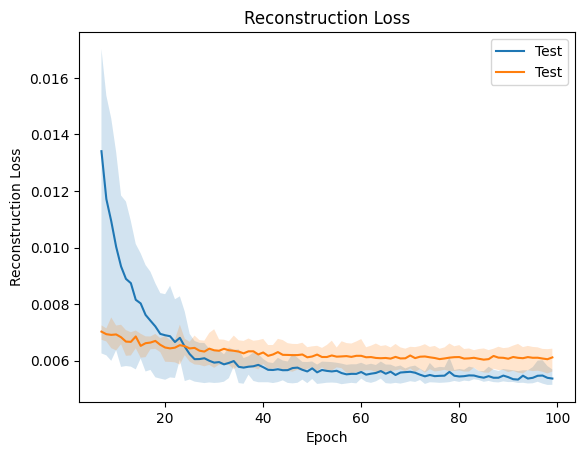

In [1]:
import pandas as pd
from requests import get
from seaborn import lineplot
import matplotlib.pyplot as plt
import matplotlib
import os

from sympy import plot
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })
from crossval_result_loader import drop_unnecessary_columns, get_main_columns

def get_save_path_and_load(path_to_csv):
    df = pd.read_csv(path_to_csv)
    df = drop_unnecessary_columns(df)
    save_path = "../paper/figures/results/"
    file_name = path_to_csv.split("/")[-1].split(".")[0]
    save_dir = path_to_csv.split("/")[:-1][-1]
    print(save_dir)
    save_dir = save_path + save_dir + "/"
    print(save_dir)
    os.makedirs(save_dir, exist_ok=True)
    
    return df, save_dir, file_name
    
def get_y_label(df):
    for column in df.columns:
        if "kl_loss" in column:
            return "KL Loss"
        if "recon_loss" in column:
            return "Reconstruction Loss"
        if "vq_loss" in column:
            return "VQ objective Loss"
    raise ValueError("No column found")

def plot_csv_file(path_to_csv, title, skip_first_n_epochs=None):
    df, save_path, file_name = get_save_path_and_load(path_to_csv)
        
    plt.title(title)
    plt.ylabel(get_y_label(df))
    plt.xlabel("Epoch")
    
    # skip first 3 epochs
    if skip_first_n_epochs is not None:
        df = df[df["epoch"] > skip_first_n_epochs]
    for main_column in get_main_columns(df):
        ax = lineplot(data=df, x=df["epoch"], y=main_column, errorbar=None, label = get_method_name(main_column))
        ax.fill_between(df["epoch"], df[main_column + "__MIN"], df[main_column + "__MAX"], alpha=0.2)

    plt.savefig(save_path + file_name+".pgf")
    plt.show()
    

def get_method_name(filename) -> str:
    return "Test"

# SCVAE2D_EXACT
# KL plot
path_to_csv = "plots/SCVAE2D_EXACT/kl_loss.csv"
plot_csv_file(path_to_csv, "KL Loss")

# Recon plot
path_to_csv = "plots/SCVAE2D_EXACT/recon_loss.csv"
plot_csv_file(path_to_csv, "Reconstruction Loss")


# SCVQVAE2D_EXACT
# VQ objective plot
path_to_csv = "plots/SCVQVAE2D_EXACT/vq_loss.csv"
plot_csv_file(path_to_csv, "VQ Loss", skip_first_n_epochs=3)

# Recon plot
path_to_csv = "plots/SCVQVAE2D_EXACT/recon_loss.csv"
plot_csv_file(path_to_csv, "Reconstruction Loss", skip_first_n_epochs=6)





